<a href="https://colab.research.google.com/github/psukphranee/Python-Practice/blob/master/SAR_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

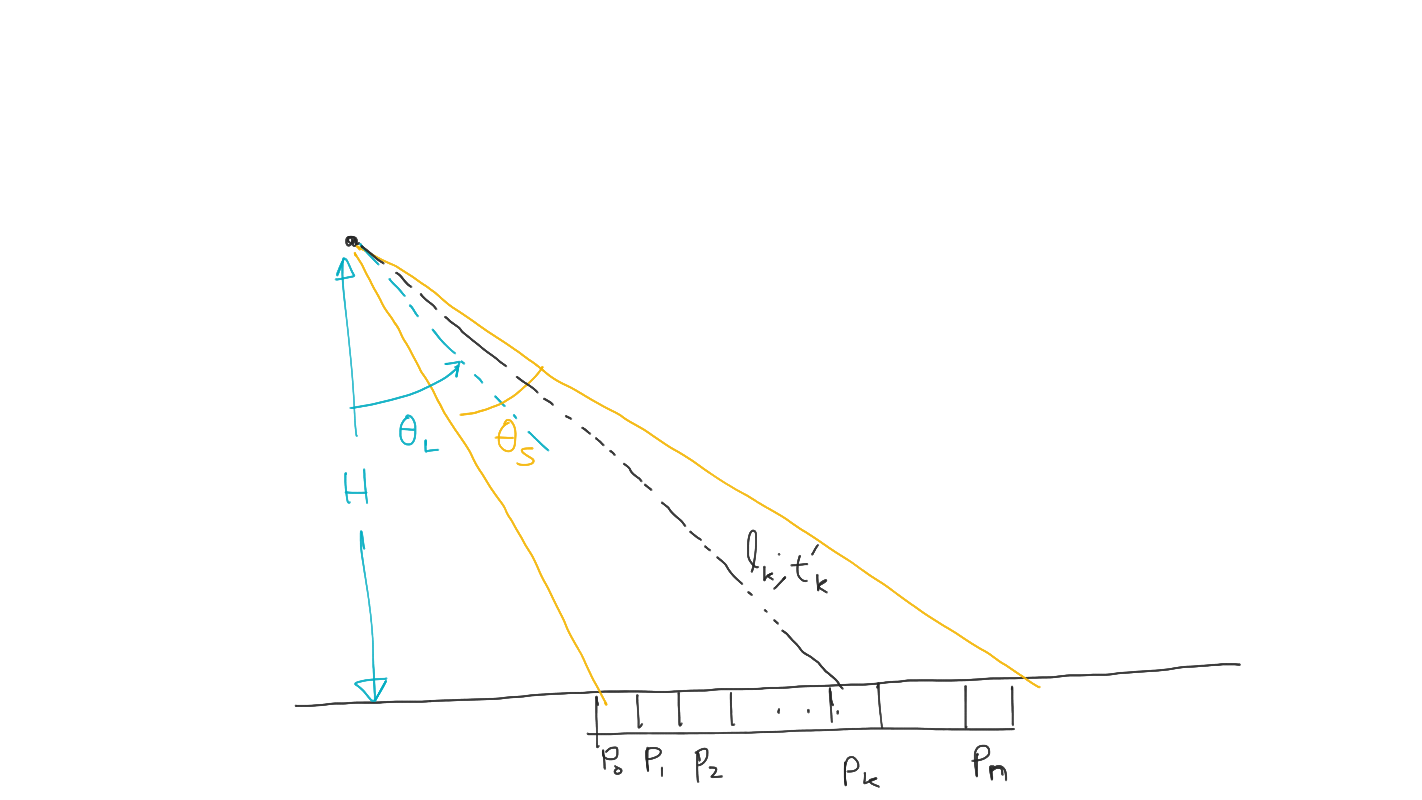

In [2]:
from IPython.display import Image
Image(filename="drive/MyDrive/Colab Notebooks/sar.png")

# Plot LFM Pulse for a visual.

## $P(t) = \chi_{\tau}(t) e^{j 2 \pi (f_c t + \frac{1}{2}k t^2)}$.

$\chi_{\tau}(t)$ piecewise function describing pulse envelope

$f_c$ = carrier frequency

$k$ = chirp rate

Define and visualize the pulse envelope and wave separately. Then combine by multiplying.

## Characteristic Function

Function describes envelope that LFM is "wrapped" in.

$
\chi(t)=
    \begin{cases}
        A & \text{if } t \in [0, \tau]\\
        0 & otherwise
    \end{cases}
$

We can achive the rectangular profile of $\chi$ by first considering the function $y = \left|\frac{1}{\tau_{.5}} t \right|$, giving us two lines intersecting $(\tau_{.5}, \pm1)$. The result is then booleanized giving us a rectangle of height $1$ and width $\tau := 2 \tau_{.5}$. We can then transform this rectangle by scaling and translating however we'd like.

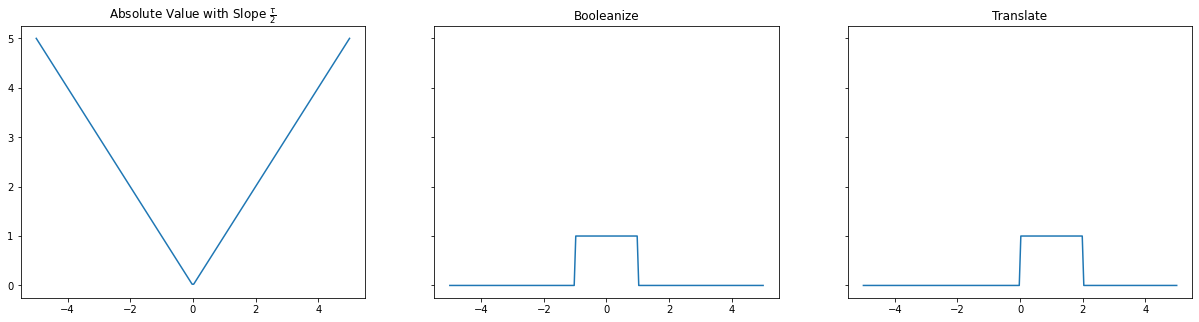

In [121]:
#Characteristic function, chi

# define pulse width tau and pulse height A
A = 2;
tau = 2; 
tau_half = tau/2;

#time
t = np.linspace(-5, 5, 200);
#pulse envelope
pre_chi_0 = np.abs((t)/tau_half);           #step 1
pre_chi_1 = np.abs((t)/tau_half) <= 1;      #step 2
chi = np.abs((t-tau_half)/tau_half) <= 1;   #step 3

fig, ax = plt.subplots(1, 3, figsize=(21,5), sharey=True)
ax[0].plot(t, pre_chi_0)
ax[0].set_title(r'Absolute Value with Slope $\frac{\tau}{2}$')
ax[1].plot(t, pre_chi_1)
ax[1].set_title("Booleanize")
ax[2].plot(t, chi)
ax[2].set_title("Translate")

plt.show()

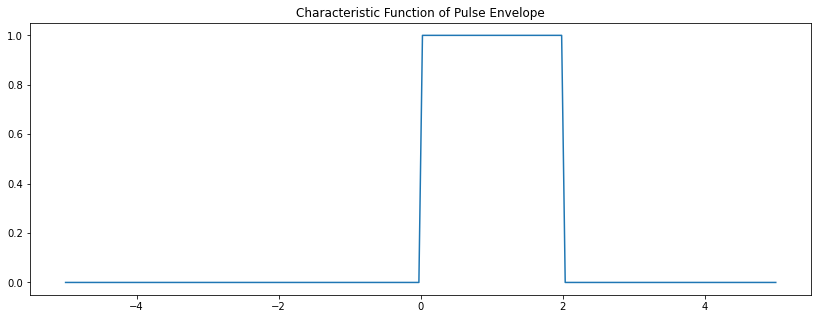

In [81]:
#LFM

#chirp rate
k = 1
#carrier frequency
f_c = 1
#time intervals to be plotted along abscissa
t = np.linspace(-5, 5, 200) 
#argument to be passed to exponenetial 
exp_arg = 2j*np.pi*(f_c*t + .5*k*(t**2))
LFM = np.exp(exp_arg);

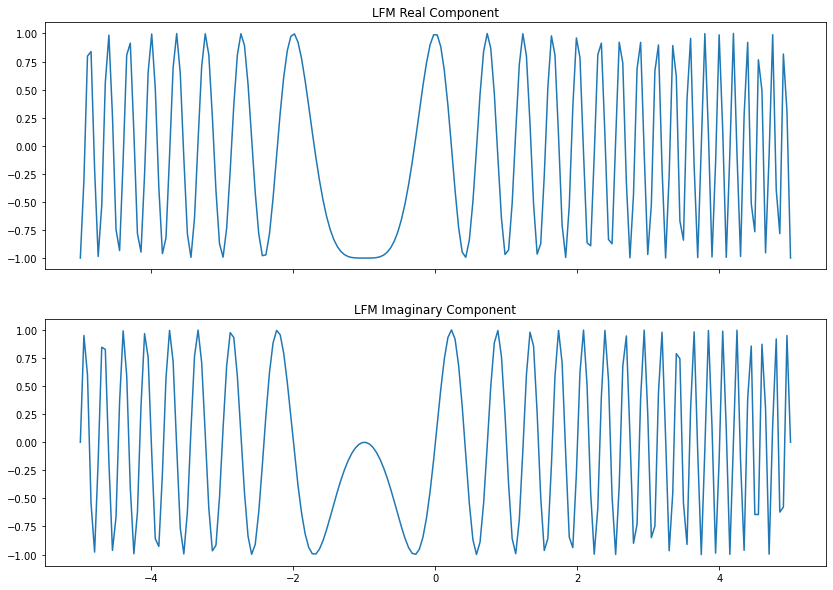

In [82]:
fig, ax = plt.subplots(2,1, figsize=(14,10), sharex=True)
ax[0].plot(t, np.real(LFM))
ax[1].plot(t, np.imag(LFM))

ax[0].set_title("LFM Real Component")
ax[1].set_title("LFM Imaginary Component")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


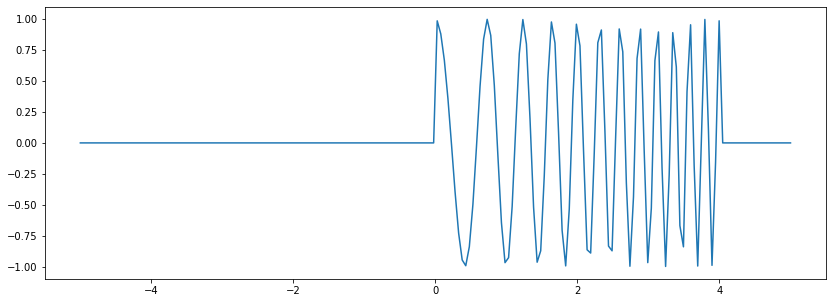

In [83]:
pulse = chi*LFM

plt.figure(figsize=(14,5))
plt.plot(t, pulse)
plt.show()